In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, Normalizer, FunctionTransformer
from sklearn.decomposition import NMF
from sklearn.model_selection import GridSearchCV


In [2]:
my_songs = pd.read_parquet('./datasets/cleaned/music-recommendation-system/liked/personal-playlists.parquet')

# check how many duplicated songs
print(my_songs.shape)
print(my_songs[my_songs.duplicated(subset=['id'])].shape)

(226, 23)
(18, 23)


In [3]:
# remove duplicated songs
no_dup_songs = my_songs.drop_duplicates(subset=['id'])

print(no_dup_songs.shape)
print(no_dup_songs[no_dup_songs.duplicated(subset=['id'])].shape)

(208, 23)
(0, 23)


In [10]:
# exclude columns with object type and a column called 'like'
df = no_dup_songs.select_dtypes(exclude=['object']).drop(['like', 'listen'], axis=1)
df.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,88,0.639,0.7230,7,-6.462,0,0.0532,0.511,0.000000,0.167,0.878,136.872,187558,4
1,83,0.472,0.5180,8,-7.379,1,0.0510,0.383,0.127000,0.289,0.154,147.805,211667,4
2,68,0.848,0.3640,11,-10.058,1,0.0637,0.697,0.005290,0.140,0.569,137.541,214160,4
3,61,0.361,0.0203,11,-25.064,1,0.0555,0.925,0.002240,0.114,0.351,76.621,123320,4
4,82,0.440,0.3170,8,-9.258,1,0.0531,0.891,0.000005,0.141,0.268,169.914,233456,3


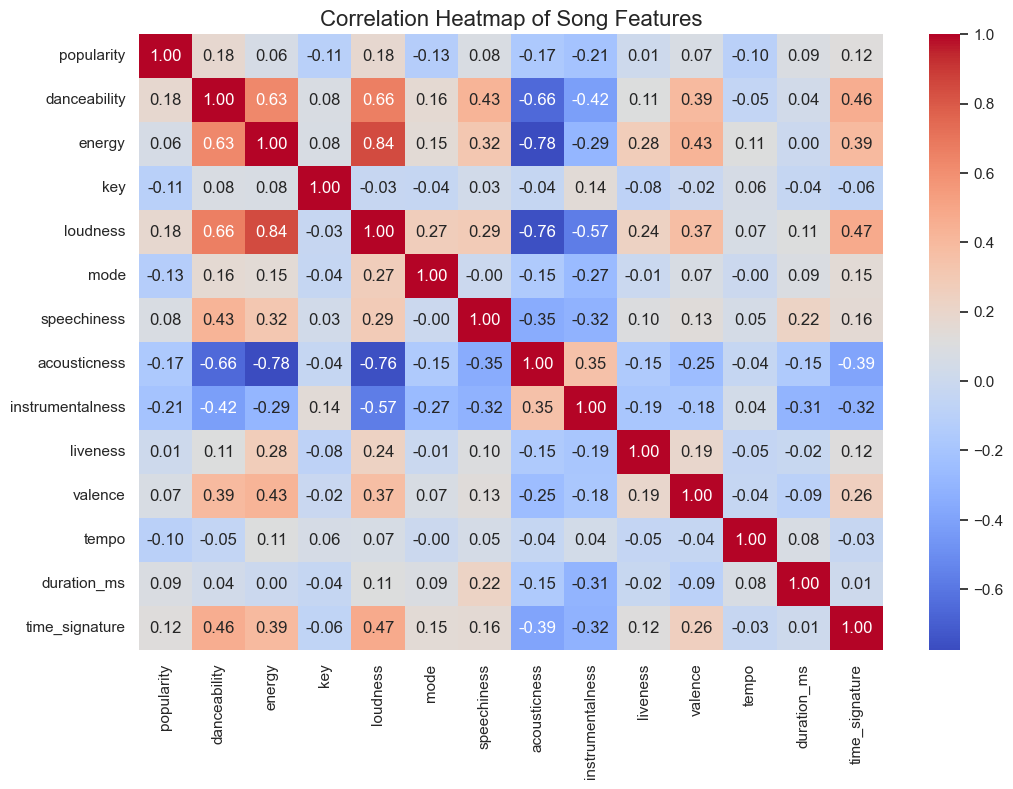

In [39]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[df.columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Song Features", fontsize=16)
plt.show()

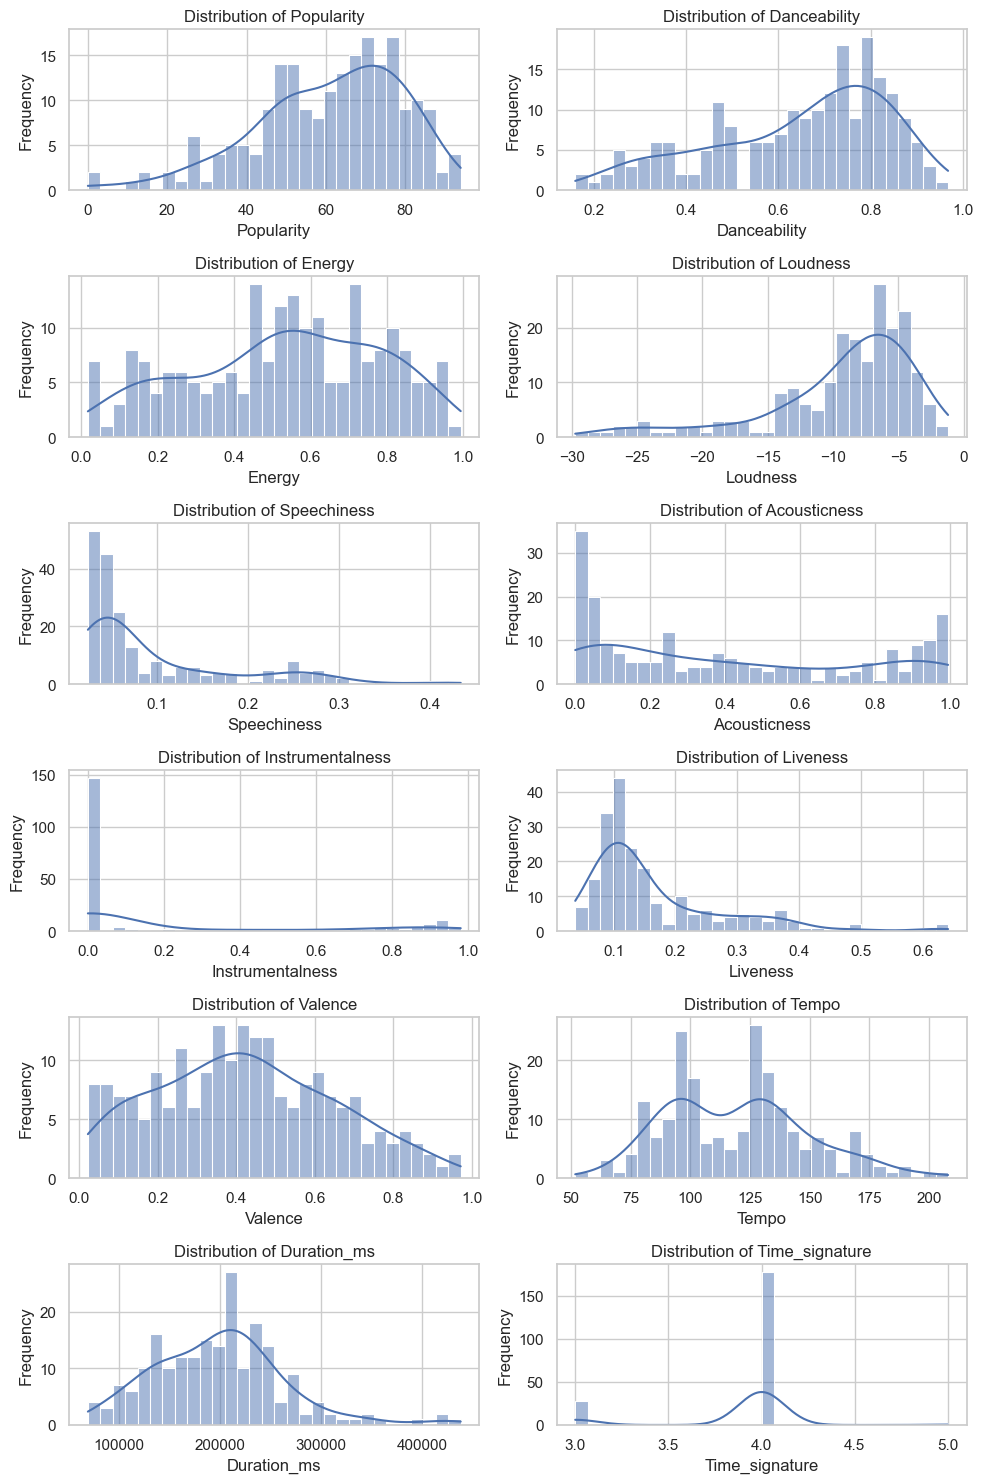

In [44]:
sns.set_style("whitegrid")

# List of continuous attributes to plot
continuous_attributes = ['popularity', 'danceability', 'energy', 'loudness', 
                         'speechiness', 'acousticness', 'instrumentalness', 
                         'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

# Creating a grid of distribution plots
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 15))
axes = axes.flatten()  # Flatten the matrix of axes to easily iterate over it

for i, attr in enumerate(continuous_attributes):
    sns.histplot(df[attr], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {attr.capitalize()}')
    axes[i].set_xlabel(attr.capitalize())
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

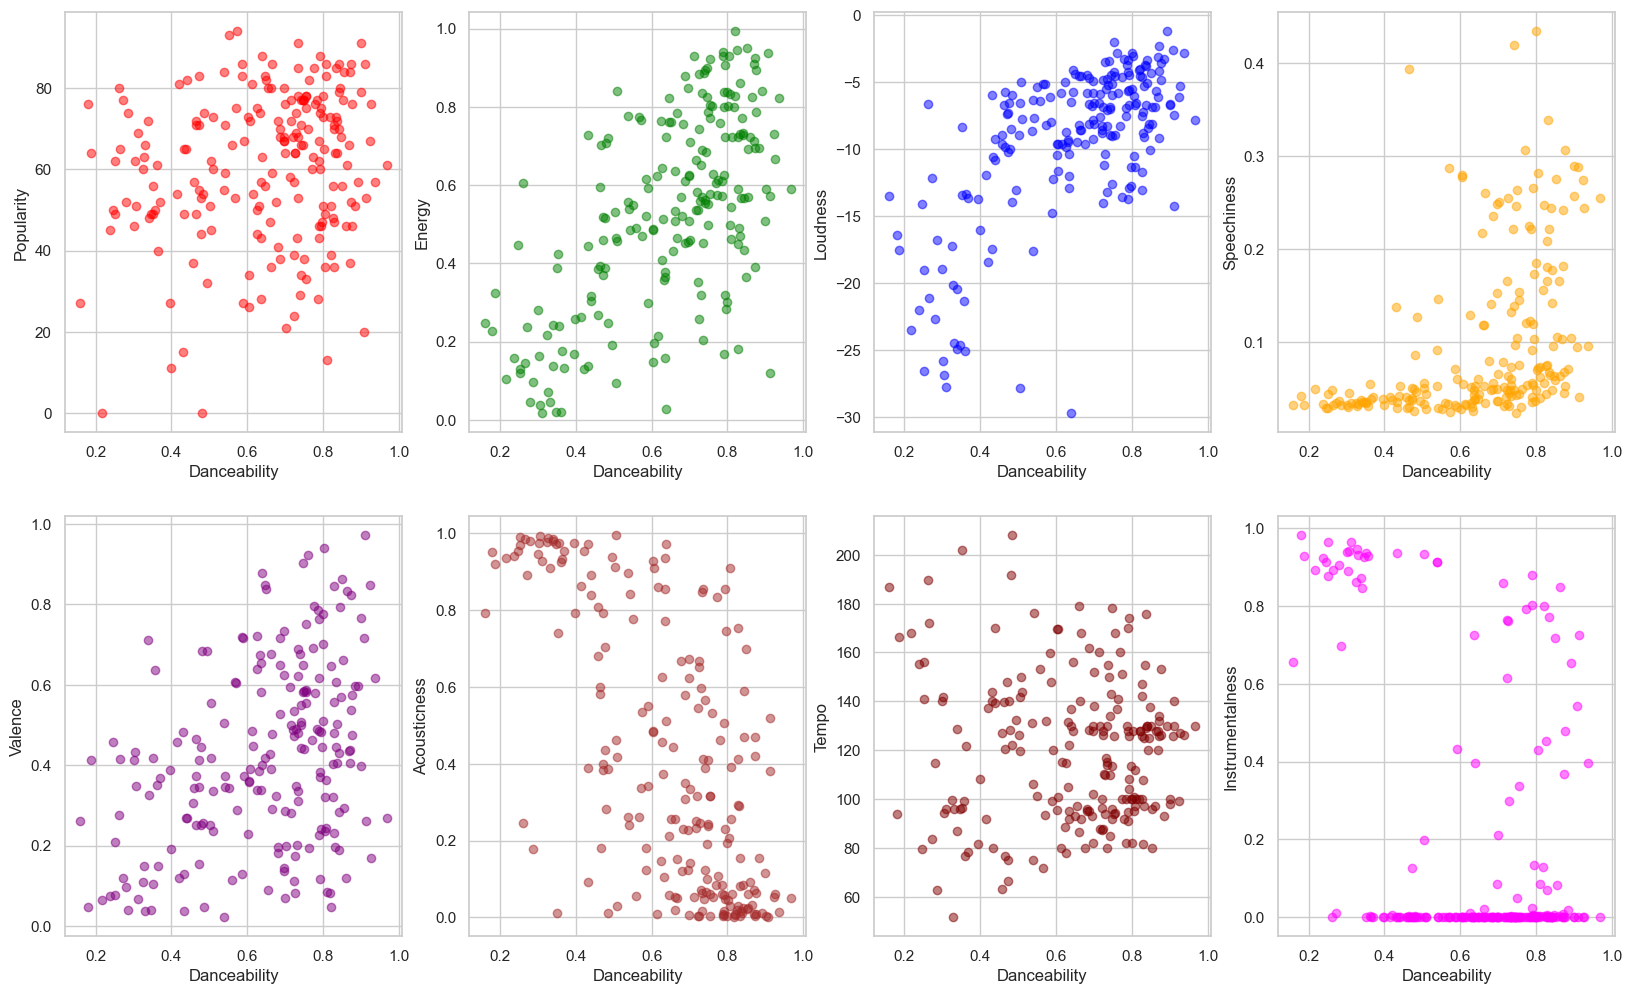

In [56]:
# I want to create 2x2 grid of scatter plots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))

# There are 4 columns that I want to plot against danceability
# popularity, energy, loudness, speechiness, valence, and acousticness
columns = ['popularity', 'energy', 'loudness', 'speechiness', 'valence', 'acousticness', 'tempo', 'instrumentalness']

# Create a list of colors to use for the scatter plot
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'maroon', 'magenta']

# Iterate over the axes matrix and plot each column against danceability
for i, ax in enumerate(axes.flatten()):
    ax.scatter(df['danceability'], df[columns[i]], color=colors[i], alpha=0.5)
    ax.set_xlabel('Danceability')
    ax.set_ylabel(columns[i].capitalize())

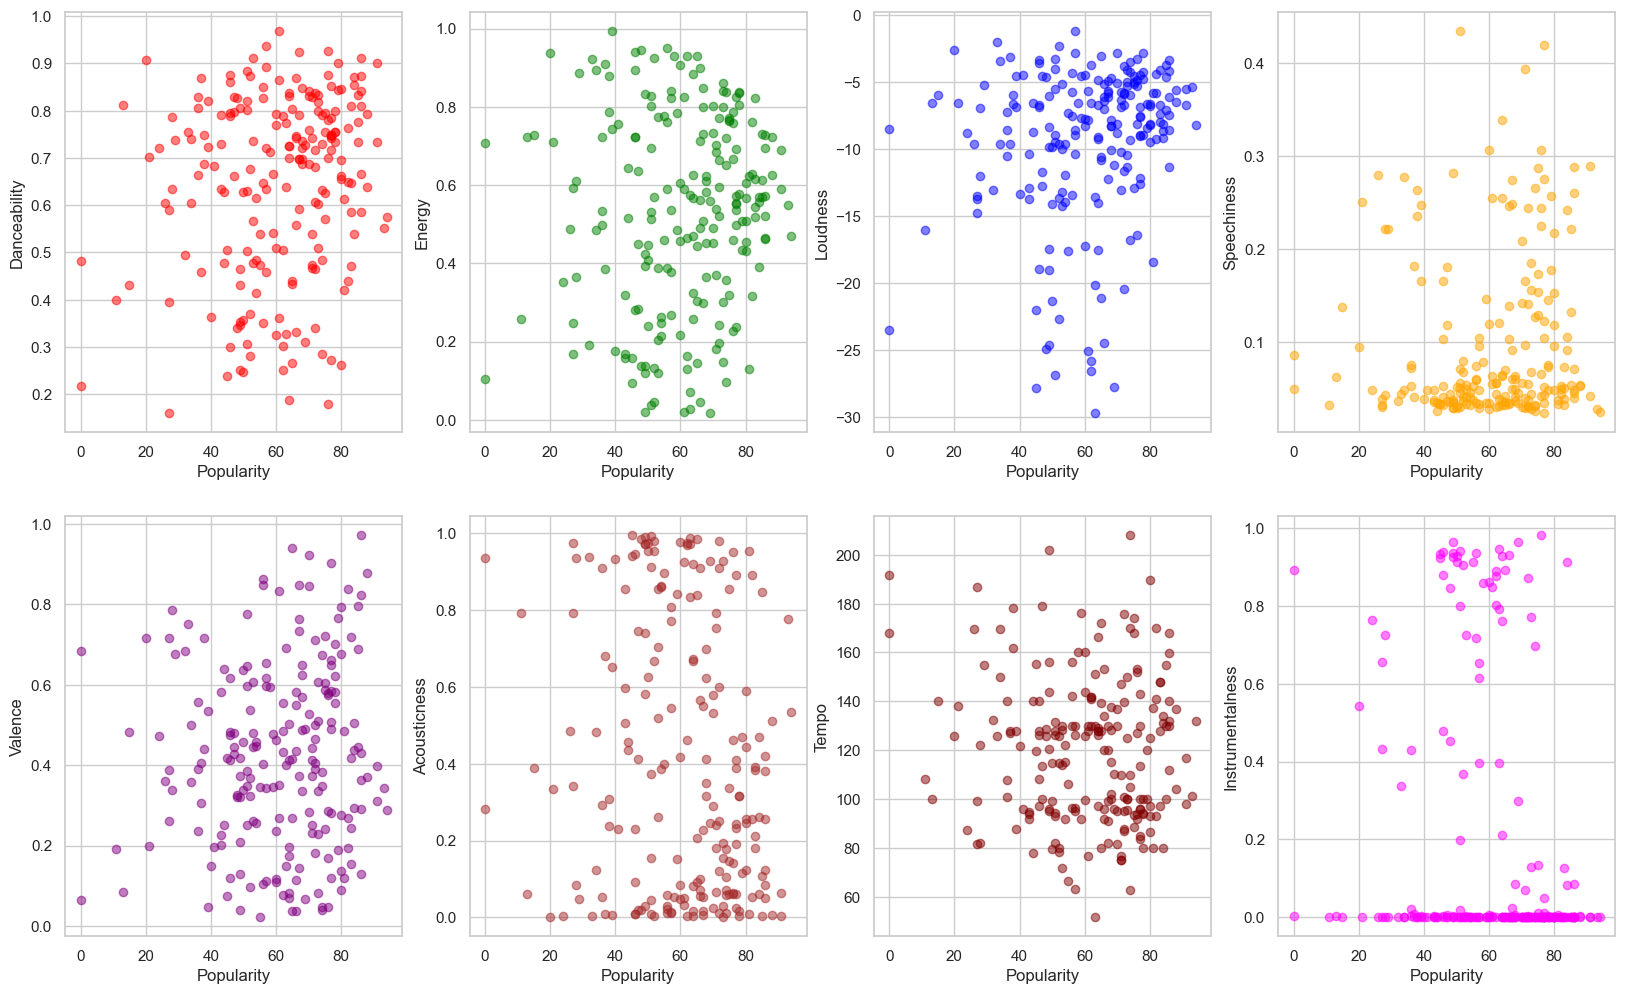

In [57]:
# I want to create 2x2 grid of scatter plots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))

# There are 4 columns that I want to plot against danceability
# popularity, energy, loudness, speechiness, valence, and acousticness
columns = ['danceability', 'energy', 'loudness', 'speechiness', 'valence', 'acousticness', 'tempo', 'instrumentalness']

# Create a list of colors to use for the scatter plot
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'maroon', 'magenta']

# Iterate over the axes matrix and plot each column against danceability
for i, ax in enumerate(axes.flatten()):
    ax.scatter(df['popularity'], df[columns[i]], color=colors[i], alpha=0.5)
    ax.set_xlabel('Popularity')
    ax.set_ylabel(columns[i].capitalize())

In [24]:
reconstruction_errors = []
dimensions = range(2, df.columns.size + 1)

# create an elbow plot to determine the optimal number of dimensions
for dimension in dimensions:
  pipeline = make_pipeline(
    MinMaxScaler(),
    NMF(
      n_components=dimension,
      max_iter=10000,
    ),
    Normalizer()
  )
  pipeline.fit(df)
  reconstruction_errors.append(pipeline.named_steps['nmf'].reconstruction_err_)

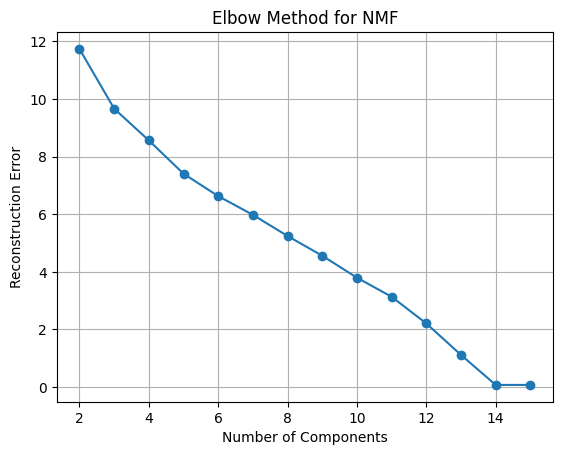

In [25]:
plt.plot(dimensions, reconstruction_errors, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('Elbow Method for NMF')
plt.grid(True)
plt.show()

In [26]:
values = df.values[:, :-1].astype(np.float64)
min_max_values = MinMaxScaler().fit_transform(values)
normalized_values = Normalizer().fit_transform(min_max_values)

In [27]:
print(df.head())

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          88         0.639  0.7230    7    -6.462     0       0.0532   
1          83         0.472  0.5180    8    -7.379     1       0.0510   
2          68         0.848  0.3640   11   -10.058     1       0.0637   
3          61         0.361  0.0203   11   -25.064     1       0.0555   
4          82         0.440  0.3170    8    -9.258     1       0.0531   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0         0.511          0.000000     0.167    0.878  136.872       187558   
1         0.383          0.127000     0.289    0.154  147.805       211667   
2         0.697          0.005290     0.140    0.569  137.541       214160   
3         0.925          0.002240     0.114    0.351   76.621       123320   
4         0.891          0.000005     0.141    0.268  169.914       233456   

   time_signature  listen  
0               4       1  
1               4       1  
2       

In [28]:
pipeline = make_pipeline(
  MinMaxScaler(), 
  NMF(
    n_components=7,
    init='random',
    random_state=0,
    max_iter=100000
  ),
  Normalizer()
)
features = pipeline.fit_transform(df)
components = pipeline.named_steps['nmf'].components_

In [29]:
categories = pd.DataFrame(components, columns=df.columns.values)
print(categories)

   popularity  danceability    energy       key  loudness      mode  \
0    0.534903      0.298442  0.270266  0.000000  0.408649  0.000000   
1    0.000000      0.106725  0.068626  0.000000  0.189821  1.637913   
2    0.001453      0.000000  0.093944  0.023366  0.000000  0.000000   
3    0.000000      0.104355  0.006865  1.335583  0.023123  0.000000   
4    0.000000      0.509518  0.388543  0.000000  0.358000  0.000000   
5    0.337989      0.788880  0.924321  0.000000  0.821795  0.000000   
6    0.654970      0.116540  0.000000  0.000000  0.274794  0.000000   

   speechiness  acousticness  instrumentalness  liveness   valence     tempo  \
0     0.000000      0.000000          0.000000  0.018999  0.000000  0.229539   
1     0.000000      0.000000          0.000000  0.000000  0.000000  0.104684   
2     0.000000      0.043522          1.249295  0.000000  0.000000  0.246392   
3     0.000000      0.000000          0.000000  0.000000  0.000000  0.009809   
4     1.472285      0.000000   

In [30]:
for i in range(0, len(categories)):
    print(f"Category {i}: {categories.iloc[i].sort_values(ascending=False).index.values[0]}")

Category 0: popularity
Category 1: mode
Category 2: instrumentalness
Category 3: key
Category 4: speechiness
Category 5: valence
Category 6: acousticness


In [31]:
cat = [
  {
    "value": 0,
    "label": "popularity"
  },
  {
    "value": 1,
    "label": "mode"
  },
  {
    "value": 2,
    "label": "instrumentalness"
  },
  {
    "value": 3,
    "label": "key"
  },
  {
    "value": 4,
    "label": "speechiness"
  },
  {
    "value": 5,
    "label": "valence"
  },
  {
    "value": 6,
    "label": "acousticness"
  }
]

In [32]:
no_dup_songs.head()

,id,title,artist(s),popularity,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,listen,like
0,2i2gDpKKWjvnRTOZRhaPh2,Moonlight,Kali Uchis,88,0.639,0.7230,7,-6.462,0,0.0532,...,0.878,136.872,audio_features,spotify:track:2i2gDpKKWjvnRTOZRhaPh2,https://api.spotify.com/v1/tracks/2i2gDpKKWjvn...,https://api.spotify.com/v1/audio-analysis/2i2g...,187558,4,1,1
1,26hOm7dTtBi0TdpDGl141t,Die For You,Joji,83,0.472,0.5180,8,-7.379,1,0.0510,...,0.154,147.805,audio_features,spotify:track:26hOm7dTtBi0TdpDGl141t,https://api.spotify.com/v1/tracks/26hOm7dTtBi0...,https://api.spotify.com/v1/audio-analysis/26hO...,211667,4,1,1
2,0edtKj1oW6rJ9f4wRtLPPH,Traingazing,Sam Wills,68,0.848,0.3640,11,-10.058,1,0.0637,...,0.569,137.541,audio_features,spotify:track:0edtKj1oW6rJ9f4wRtLPPH,https://api.spotify.com/v1/tracks/0edtKj1oW6rJ...,https://api.spotify.com/v1/audio-analysis/0edt...,214160,4,1,1
3,1xHrPq8WvLKiO6lT94Ks2F,See You Later,EKKSTACY,61,0.361,0.0203,11,-25.064,1,0.0555,...,0.351,76.621,audio_features,spotify:track:1xHrPq8WvLKiO6lT94Ks2F,https://api.spotify.com/v1/tracks/1xHrPq8WvLKi...,https://api.spotify.com/v1/audio-analysis/1xHr...,123320,4,1,1
4,4ewazQLXFTDC8XvCbhvtXs,Glimpse of Us,Joji,82,0.440,0.3170,8,-9.258,1,0.0531,...,0.268,169.914,audio_features,spotify:track:4ewazQLXFTDC8XvCbhvtXs,https://api.spotify.com/v1/tracks/4ewazQLXFTDC...,https://api.spotify.com/v1/audio-analysis/4ewa...,233456,3,1,1


In [33]:
no_dup_songs['title'].values

array(['Moonlight', 'Die For You', 'Traingazing', 'See You Later',
       'Glimpse of Us', 'La La Lost You - Acoustic Version', 'blue',
       'Surf', 'Good News', 'Jocelyn Flores', 'Come Back to Earth',
       'Habits (Stay High)', 'Best Part (feat. H.E.R.)', 'Here With Me',
       'Until I Found You - Piano Version', 'i love you', 'Idea 10',
       'Idea 1', 'Solas', 'Idea 22', 'Idea 10 (Slowed & Reverb)',
       'Idea 22 (Slowed + Reverb)', 'Idea 10 (Sped Up)',
       'Solas (Sped Up)', 'Idea 22 (Sped Up)', 'dream river.',
       'Cornfield Chase - Piano-Cello Version', 'Cornfield Chase',
       'Interstellar Cornfield Chase', 'Cornfield Chase - Piano Version',
       'Time', 'Day One (Interstellar Theme)', 'The Son of Flynn',
       'See You Tomorrow', 'Seaton Village', 'Idea 9',
       'Cornfield Chase (Slowed + Reverb)', 'Solas (Slowed + Reverb)',
       'Starry Night', 'Si Te Preguntan...', 'Hey Mor', 'Kotodama',
       'Monotonía', 'Egoísta', 'Vaina Loca', 'Caramelo - Remix',
 

In [34]:
index_values = [f"{title} - {artist}" for title, artist in zip(no_dup_songs['title'].values, no_dup_songs['artist(s)'].values)]
processed_songs = pd.DataFrame(features, index=index_values)
processed_songs.columns = [cat[i]['label'] for i in range(0, len(cat))]
processed_songs

,popularity,mode,instrumentalness,key,speechiness,valence,acousticness
Moonlight - Kali Uchis,0.687819,0.000000,0.022677,0.420572,0.037392,0.461799,0.367225
Die For You - Joji,0.795659,0.419812,0.084564,0.367031,0.034901,0.063033,0.208879
Traingazing - Sam Wills,0.421927,0.482856,0.007271,0.598761,0.072504,0.241463,0.408288
See You Later - EKKSTACY,0.000000,0.502542,0.000000,0.633809,0.000000,0.061599,0.584759
Glimpse of Us - Joji,0.544596,0.482510,0.030081,0.428721,0.071149,0.001509,0.529932
...,...,...,...,...,...,...,...
辣台妹 - 頑童Mj116,0.646431,0.504005,0.000000,0.394829,0.324743,0.258376,0.000000
幹大事 - 頑童Mj116,0.817831,0.506024,0.000000,0.065232,0.198213,0.177620,0.000000
妹妹 - 瘦子E.SO,0.518364,0.513800,0.004058,0.572601,0.115685,0.338621,0.106643
FaceTime - Karencici,0.504203,0.550819,0.000000,0.552539,0.058137,0.135467,0.339628


In [35]:
print(processed_songs[:5])

                          popularity      mode  instrumentalness       key  \
Moonlight - Kali Uchis      0.687819  0.000000          0.022677  0.420572   
Die For You - Joji          0.795659  0.419812          0.084564  0.367031   
Traingazing - Sam Wills     0.421927  0.482856          0.007271  0.598761   
See You Later - EKKSTACY    0.000000  0.502542          0.000000  0.633809   
Glimpse of Us - Joji        0.544596  0.482510          0.030081  0.428721   

                          speechiness   valence  acousticness  
Moonlight - Kali Uchis       0.037392  0.461799      0.367225  
Die For You - Joji           0.034901  0.063033      0.208879  
Traingazing - Sam Wills      0.072504  0.241463      0.408288  
See You Later - EKKSTACY     0.000000  0.061599      0.584759  
Glimpse of Us - Joji         0.071149  0.001509      0.529932  


In [36]:
wanted_song = processed_songs.loc['La La Lost You - Acoustic Version - NIKI, 88rising']
wanted_song

popularity          0.349765
mode                0.603357
instrumentalness    0.000000
key                 0.071669
speechiness         0.037637
valence             0.230538
acousticness        0.673739
Name: La La Lost You - Acoustic Version - NIKI, 88rising, dtype: float64

In [40]:
wanted_song.name

'La La Lost You - Acoustic Version - NIKI, 88rising'

In [37]:
labels = [np.argmax(processed_songs.iloc[i]) for i in range(len(processed_songs))]
songs_labels = pd.DataFrame(labels, index=index_values, columns=["label"])
songs_labels['category'] = [cat[songs_labels.iloc[i,0]].get('label') for i in range(songs_labels.shape[0])]

songs_labels.head(20)

,label,category
Moonlight - Kali Uchis,0,popularity
Die For You - Joji,0,popularity
Traingazing - Sam Wills,3,key
See You Later - EKKSTACY,3,key
Glimpse of Us - Joji,0,popularity
"La La Lost You - Acoustic Version - NIKI, 88rising",6,acousticness
blue - Kamal.,3,key
Surf - Mac Miller,0,popularity
Good News - Mac Miller,0,popularity
Jocelyn Flores - XXXTENTACION,0,popularity


In [38]:
songs_labels['category'].value_counts()

popularity          113
mode                 33
instrumentalness     23
key                  17
acousticness         14
valence               7
speechiness           1
Name: category, dtype: int64

In [39]:
recommended_songs = processed_songs.dot(wanted_song).drop(wanted_song.name, inplace=True)
print(recommended_songs.nlargest(20))

La La Lost You - Acoustic Version - NIKI, 88rising                                                     1.000000
La vie en rose (feat. Cécile McLorin Salvant) - Michael Bublé                                          0.990216
三人遊 - Khalil Fong                                                                                      0.985808
It's Been A Long, Long Time - Louis Armstrong                                                          0.966189
Le Festin - Michael Giacchino                                                                          0.965082
No Reason - Ryan.B, effie                                                                              0.957401
太陽 - 瘦子E.SO                                                                                            0.955159
L’Amour, Les Baguettes, Paris - Stella Jang                                                            0.952642
i love you - Billie Eilish                                                                             0

In [18]:
recommended_songs[recommended_songs < 0.5][:5]

title
Idea 10 (Slowed & Reverb)    0.491430
Idea 22 (Slowed + Reverb)    0.490577
Idea 10 (Sped Up)            0.464278
Solas (Sped Up)              0.461507
dream river.                 0.453827
dtype: float64

In [19]:
recommended_songs[recommended_songs < 0.8].shape

(170,)

In [20]:
no_dup_songs.head()

,id,title,artist(s),popularity,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,listen,like
0,2i2gDpKKWjvnRTOZRhaPh2,Moonlight,Kali Uchis,88,0.639,0.7230,7,-6.462,0,0.0532,...,0.878,136.872,audio_features,spotify:track:2i2gDpKKWjvnRTOZRhaPh2,https://api.spotify.com/v1/tracks/2i2gDpKKWjvn...,https://api.spotify.com/v1/audio-analysis/2i2g...,187558,4,1,1
1,26hOm7dTtBi0TdpDGl141t,Die For You,Joji,83,0.472,0.5180,8,-7.379,1,0.0510,...,0.154,147.805,audio_features,spotify:track:26hOm7dTtBi0TdpDGl141t,https://api.spotify.com/v1/tracks/26hOm7dTtBi0...,https://api.spotify.com/v1/audio-analysis/26hO...,211667,4,1,1
2,0edtKj1oW6rJ9f4wRtLPPH,Traingazing,Sam Wills,68,0.848,0.3640,11,-10.058,1,0.0637,...,0.569,137.541,audio_features,spotify:track:0edtKj1oW6rJ9f4wRtLPPH,https://api.spotify.com/v1/tracks/0edtKj1oW6rJ...,https://api.spotify.com/v1/audio-analysis/0edt...,214160,4,1,1
3,1xHrPq8WvLKiO6lT94Ks2F,See You Later,EKKSTACY,61,0.361,0.0203,11,-25.064,1,0.0555,...,0.351,76.621,audio_features,spotify:track:1xHrPq8WvLKiO6lT94Ks2F,https://api.spotify.com/v1/tracks/1xHrPq8WvLKi...,https://api.spotify.com/v1/audio-analysis/1xHr...,123320,4,1,1
4,4ewazQLXFTDC8XvCbhvtXs,Glimpse of Us,Joji,82,0.440,0.3170,8,-9.258,1,0.0531,...,0.268,169.914,audio_features,spotify:track:4ewazQLXFTDC8XvCbhvtXs,https://api.spotify.com/v1/tracks/4ewazQLXFTDC...,https://api.spotify.com/v1/audio-analysis/4ewa...,233456,3,1,1


In [21]:
wanted_songs = no_dup_songs['title'].head().values
recommended_songs = []

for song in wanted_songs:
  # for each song, get the top 10 most similar songs
  similar_songs = processed_songs.dot(processed_songs.loc[song])
  # append the top 10 most similar songs to the recommended_songs list
  recommended_songs.append(similar_songs.nlargest(10).index.values)

print(wanted_songs)

for songs in recommended_songs:
  print(songs)

['Moonlight' 'Die For You' 'Traingazing' 'See You Later' 'Glimpse of Us']
['Moonlight' 'Si Te Preguntan...' 'What Do You Mean?' 'Loser'
 'Make You Say' 'Love$ick (feat. A$AP Rocky)'
 'Everybody Dies In Their Nightmares'
 'Fly Me To The Moon - 2008 Remastered'
 'Just the Two of Us (feat. Bill Withers)' 'You']
['Die For You' 'Love Me Like You Do - From "Fifty Shades Of Grey"'
 "Ballin' (with Roddy Ricch)" 'Passionfruit' 'Weekend (feat. Miguel)'
 'Here With Me' 'BUTTERFLY EFFECT' 'goosebumps' 'Leave The Door Open'
 'You Right - Extended']
['Traingazing' "I'm Not The Only One - Sped Up" 'FaceTime'
 'Until I Found You (with Em Beihold) - Em Beihold Version' 'La mer'
 'Wonderful tonight' '愛愛愛' 'Love Song' '為妳寫的歌' '紅豆']
['See You Later' '象牙舟' 'What A Wonderful World' 'La Vie en rose'
 'ocean eyes - sped up' 'La mer' 'Until I Found You - Piano Version'
 'good days - sped up' 'Traingazing' 'Singalongsong']
['Glimpse of Us' 'Until I Found You - Piano Version'
 'Until I Found You (with Em Beihold